# https://github.com/KimGroup/X-TEC

## Harnessing Interpretable and Unsupervised Machine Learning to Address Big Data from Modern X-ray Diffraction

### https://arxiv.org/abs/2008.03275

###### Jordan Venderley$^1$, Michael Matty$^1$, Krishnanand Mallaya$^1$, Matthew Krogstad$^2$, Jacob Ruff$^3$, Geoff Pleiss$^4$, Varsha Kishore$^4$, David Mandrus$^5$, Daniel Phelan$^2$, Lekh Poudel$^{6,7}$, Andrew Gordon Wilson$^8$,Kilian Weinberger$^4$, Puspa Upreti$^{2,9}$, M. R. Norman$^2$, Stephan Rosenkranz$^2$, Raymond Osborn$^2$, Eun-Ah Kim$^{1\ast}$

###### $^{1}$Department of Physics, Cornell University
###### $^{2}$Materials Science Division, Argonne National Laboratory
###### $^{3}$Cornell High Energy Synchrotron Source, Cornell University
###### $^{4}$Department of Computer Science, Cornell University
###### $^{5}$Department of Materials Science and Engineering, University of Tennessee
###### $^{6}$Department of Materials Science and Engineering, University of Maryland
###### $^{7}$NIST Center for Neutron Research, National Institute of Standard and Technology
###### $^{8}$Courant Institute of Mathematical Sciences, New York University
###### $^{9}$Department of Physics, Northern Illinois University





### Tutorial by Krishnanand Mallayya.
### For questions about X-TEC code and tutorial contact kmm537@cornell.edu (Krishnanand)



# Xray TEmperature Clustering (XTEC)

The massive data that modern facilities generate spanning 3D reciprocal space volumes include $\mathcal{O}(10^4)$ Brillouin zones (BZ) at rates of $\mathcal{O}(10^2)$ gigabytes per hour. The sheer quantity of data presents a major challenge in searching for unknown order parameters and their fluctuations.


When the temperature $T$ is lowered below a certain threshold, the system can give way to an ordered state. Hence the temperature ($T$) evolution of the X-ray diffraction (XRD) intensity for reciprocal space points $\vec{q}$: $I(\vec{q}, T)$ must be qualitatively different if the given reciprocal space point $\vec{q}$ reflects order parameters or their fluctuations.
Tracking the temperature evolution of thousands of Brillouin zones to identify systematic trends and correlations in a comprehensive manner is impossible to achieve manually without selection bias.

**XTEC is an unsupervised and interpretable ML algorithm that can identify the order parameters from the voluminous data by clustering the temperature series associated with a given $\vec{q}$, $I(\vec{q},T)$, according to qualitative features in the temperature dependence.**



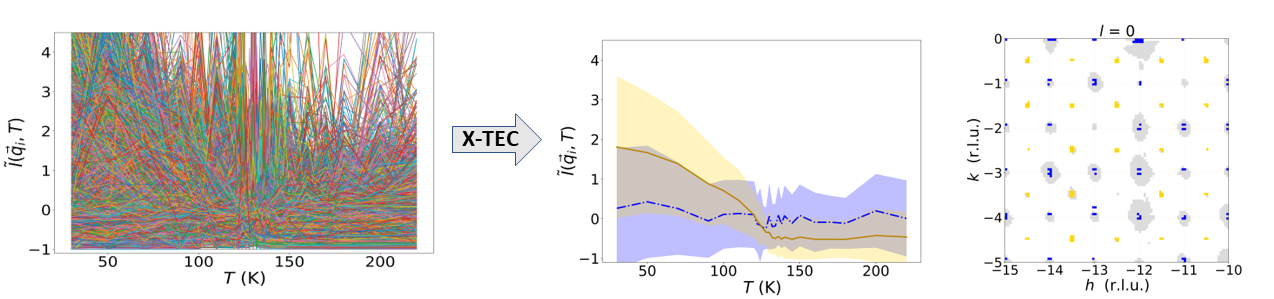

At the core of XTEC is a Gaussian Mixture Model (GMM) clustering to identify disctint temperature trajectories. The figure below shows a simplified illutration of GMM clustering behind XTEC.


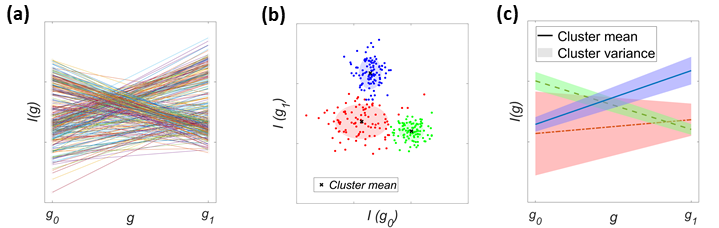

To cluster distinct $I(g)$ trajectories given the collection of series $\{I(g_0), I(g_1),\dots, I(g_{N-1})\}$ (N=2 in the above figure), the raw trajectories (in panel (a)) can be mapped to a simple Gaussian Mixture Model (GMM) clustering problem on a  $N$ dimensional space (panel (b)). In the above figure, GMM clustering identifies three distinct clusters color-coded as red, blue and green. From the GMM cluster mean and variance (panel (b)), we get the distinct trajectories of $I(g)$ and their variance (panel (c)).

Note that $g$ can be any parameter like temperature, time, energy etc. Hence apart from temperature series data, you can adapt XTEC to analysie any other  parametric dependence like time or energy series data.      


# X-TEC analysis of Sr$_3$Rh$_4$Sn$_{13}$ XRD data

Here we analyse the XRD data of Sr$_3$Rh$_4$Sn$_{13}$, a quasi-skutterudite family which shows charge density wave ordering  below a quantum critical point.

## clone the XTEC repository and mount on gdrive for the XTEC modules

To see details about the XTEC codes, check out the XTEC_codes in GitHub repository: https://github.com/KimGroup/X-TEC:
Preprocessing.py, GMM.py and GMM_kernels.py

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import time

import importlib.util
import sys

!git clone https://github.com/KimGroup/X-TEC.git



Cloning into 'X-TEC'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 261 (delta 25), reused 57 (delta 17), pack-reused 193
Receiving objects: 100% (261/261), 22.26 MiB | 18.90 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
! ls
%cd X-TEC/src/xtec
! ls

Mounted at /content/gdrive
gdrive	sample_data  X-TEC
/content/X-TEC/src/xtec
GMM.py	__init__.py  plugins  Preprocessing.py


## Import the XRD Data

The data loading can be customized to the type of file and structure of data stored.

Ultimately, one requires a temperature series of  intensity  at (Qh, Qk, Ql) points of the 3D reciprocal lattice (or equivalently in 2D reciprocal lattice) as an array with shape = (num_Temperature, num_Ql, num_Qk, num_Qh) for 3D data ( equivalently for 2D data).

The exact values of Qh, Qk and Ql would aid in plots to identify the location of pixels in reciprocal space, but otherwise they are not needed for the clustering analysis.


For this example, we use a small 2D slice: (Qh,Qk,0) of of a large volume XRD data collected for different temperatures at the Advanced Photon Source. The data is stored as a pickled file.


In [ ]:
import pickle

!wget -O Raw_data.p  https://www.dropbox.com/s/mjbyt20tt07h64i/Raw_data.p?dl=0

obj = pickle.load(open("Raw_data.p", "rb"))
I=obj['Data']
Tlist=obj['Temp']
Qh=obj['Qh']
Qk=obj['Qk']



--2024-06-07 18:47:25--  https://www.dropbox.com/s/mjbyt20tt07h64i/Raw_data.p?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/mjbyt20tt07h64i/Raw_data.p [following]
--2024-06-07 18:47:25--  https://www.dropbox.com/s/raw/mjbyt20tt07h64i/Raw_data.p
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc64a454af2500e2410300ad9461.dl.dropboxusercontent.com/cd/0/inline/CUYQlB3phQ5K4dAgOaM6DwVFagFORw8OdDha-bDueHzhI3PL5i4zoYFYn1myZ0MKVdZszyuEnvthmDQrv8PfaXAURZoiRQaXMN7GBaOX4vEJtJvr44rRAz-IECIXQvJozkDL-ST3vPMPvOxczlboEt9a/file# [following]
--2024-06-07 18:47:26--  https://uc64a454af2500e2410300ad9461.dl.dropboxusercontent.com/cd/0/inline/CUYQlB3phQ5K4dAgOaM6DwVFagFORw8OdDha-bDueHzhI3PL5i4zoYFYn1myZ0MKVdZszyuEnvthmDQrv8PfaXAURZoiRQaXMN7GBaO

In [ ]:

print('(num_T, num_h, num_k)=',I.shape)   # (num_T, num_k, num_h)
print('Temperatures (K)=',Tlist)
print('Ql = 0')
print('Qk =', Qk[0],' to ',np.round(Qk[-1],4), ' r.l.u. per pixel=',np.round(Qk[1]-Qk[0],4))
print('Qh =', Qh[0],' to ',np.round(Qh[-1],4), ' r.l.u. per pixel=',np.round(Qh[1]-Qh[0],4))

(num_T, num_h, num_k)= (24, 600, 600)
Temperatures (K)= [ 30  50  70  90 100 110 120 122 124 126 128 130 132 134 136 138 140 145
 150 160 170 180 200 220]
Ql = 0
Qk = -15.0  to  14.95  r.l.u. per pixel= 0.05
Qh = -15.0  to  14.95  r.l.u. per pixel= 0.05


### Plotting a section of the the raw data to see the CDW  peaks at low temperatures

Text(0.5, 1.0, 'T=220K')

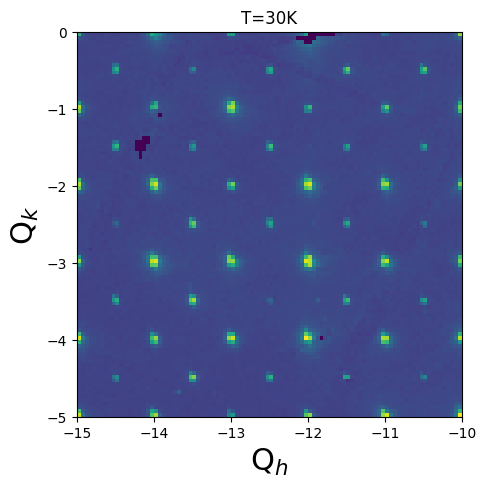

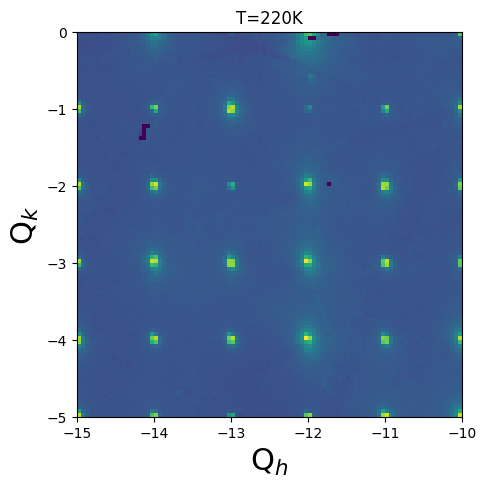

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(np.log(1+I[0][200:300,0:100]),origin="lower",extent=[Qk[0], Qk[100], Qh[200], Qh[300]])
plt.xlabel("Q$_h$",size=22)
plt.ylabel("Q$_k$",size=22)
plt.title('T='+ str(Tlist[0])+'K')

plt.figure(figsize=(5,5))
plt.imshow(np.log(1+I[-1][200:300,0:100]),origin="lower",extent=[Qk[0], Qk[100], Qh[200], Qh[300]])
plt.xlabel("Q$_h$",size=22)
plt.ylabel("Q$_k$",size=22)
plt.title('T='+ str(Tlist[-1])+'K')


Notice the CDW peaks at $(Qh,Qk,Ql)=(H+0.5,K+0.5,0)$ for $T=30$K, which is absent at $220$K.    

# X-TEC analysis

**1. Preprocessing**:

1.1 Thresholding: the data is first put through a preprocessing to remove low intensity noise:

1.2 Rescaling: for efficient feature selection of the temperature trajectory



**2. Clustering**:

The preprocessed data is clustered with Gaussian Mixture Model (GMM) to identify distinct temperature trajectories of the intensities $I(T,h,k)$.

2.1 We show simple GMM clustering, where each (h,k) point is clustered independently, ignoring the correlations between different reciprocal space points.

2.2 From the clustered results, we identify different features such as the Bragg, CDW peaks, and diffuse scattering. We  then select the interesting clusters (Bragg peaks and CDW peaks) and relegate the other clusters (diffuse region) to the thresholded background.


2.3 More sensible results can be obtained when correlations are introduced among nearby momenta, since experiments         are resolution limited and intensity peaks in reciprocal space are broadened by fluctuations and noise (local smoothness). We also expect periodic zone-to-zone correlations (periodic smoothness). These correlations are incorporated through label smoothing.
    
**Have fun!**      This is real data and there might be some interesting physics waiting to be discovered by you!!!

You can play around with this two step clustering to instead focus on the diffuse cluster rather than the Bragg and CDW peaks. Also try changing the number of clusters or go ahead with 3 step clustering and see if you find something interesting.



## 1.1 Thresholding low intensity background

Remove low intensity background noise. Assumes that the peaks/relevant
x-ray features are sparse so that most momenta have predominantely background intensity contributions.

Cutoff estimated by minimizing the Kullback-Leibler (KL) distance between the distribution of $\log[\overline{I_q(T)}]$ and a Gaussian distribution with (high intensity) sliding cutoff. See supplementary materials of  Venderley et al., https://arxiv.org/abs/2008.03275.  

See preprocessing.py for comments on the code

In [ ]:
# First remove zero intensity points from the data
from Preprocessing import Mask_Zeros

masked    = Mask_Zeros(I,'zero_mean') # removes data with zero intensity.
#Try 'zero mean' to remove points with I=0 for all T (mean intensity over T = 0), or 'any zeros': to remove points where I=0 at any T

In [ ]:
from Preprocessing import Threshold_Background    # for thresholding background intensity

threshold = Threshold_Background(masked)
# default values for other arguments: bin_size=None, threshold_type='KL', max_iter=100

# the results from thresholding are stored as
#    threshold.data_thresholded : thresholded data, shape=(num_T, num_thresholded_data)
#    threshold.ind_thresholded  : hkl indices of the thresholded data, shape=(num_data_thresholded, 3 or 2)
#    threshold.thresholded      : 0/1 on whether the corresponding pixel is thresholded. shape=(num_l, num_k,...)

data_post_thresh = threshold.data_thresholded  # shape=(num_temperatures, num_thresholded data)
print('num of original non zero data=', np.prod(threshold.data_shape_orig[1:]))
print('num of thresholded data=', data_post_thresh.shape[1])

num of original non zero data= 360000
num of thresholded data= 34565


Let us see the thresholding results.

Below is the $\log[\overline{I_q(T)}]$ distribution and the Gaussian fit with high intensity cutoff estimated from minimising KL distance.

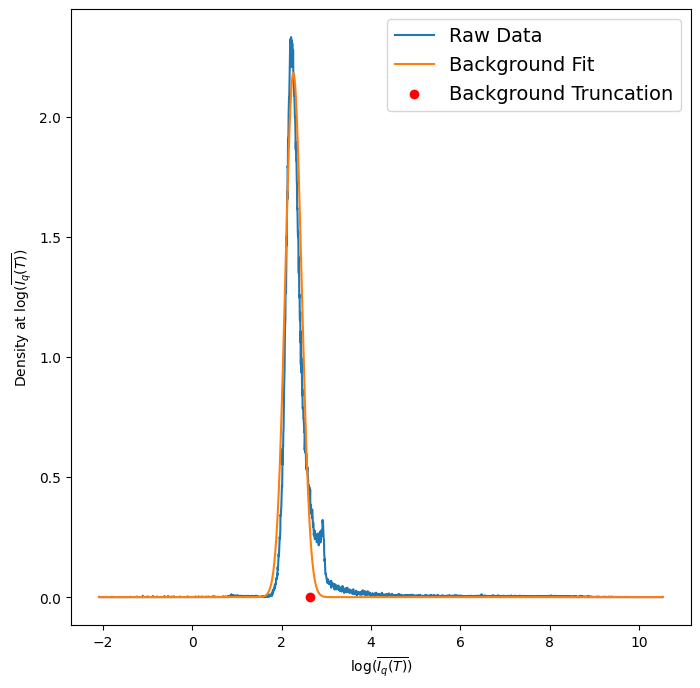

In [ ]:
figsize_=(8,8)
threshold.plot_cutoff(figsize_)

Note the non Gaussian features in the distribution just above the cutoff intensity (red dot). Those are the useful data we are after.

All data points that have $\log[\overline{I_q(T)}]$ above estimated cutoff are retained. The plot below shows those remaining points in the hk plane as grey clusters  

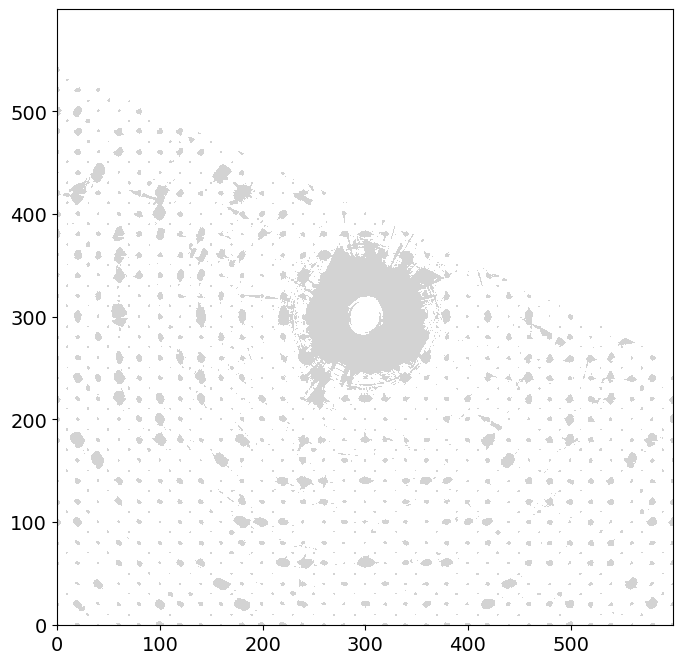

In [ ]:
figsize_=(8,8)
plot=threshold.plot_thresholding_2D_slice(figsize_)
# threshold.plot_thresholding_2D_slice(figsize_, slice_ind_, axis_) : plots the 2D image
# with points whose intensity distribution is above the cutoff marked as grey.
# if data is 3D, then set the slice ind and axis_ (default=None) to select the index of the 2D slice along axis_ =0,1 or 2.



 Plot the temperature trajectory of intensities that pass thresholding. This can take a couple of minutes to plot as there are a lot of trajectories, so you can skip this step if time is scarce.

(0.0, 10000.0)

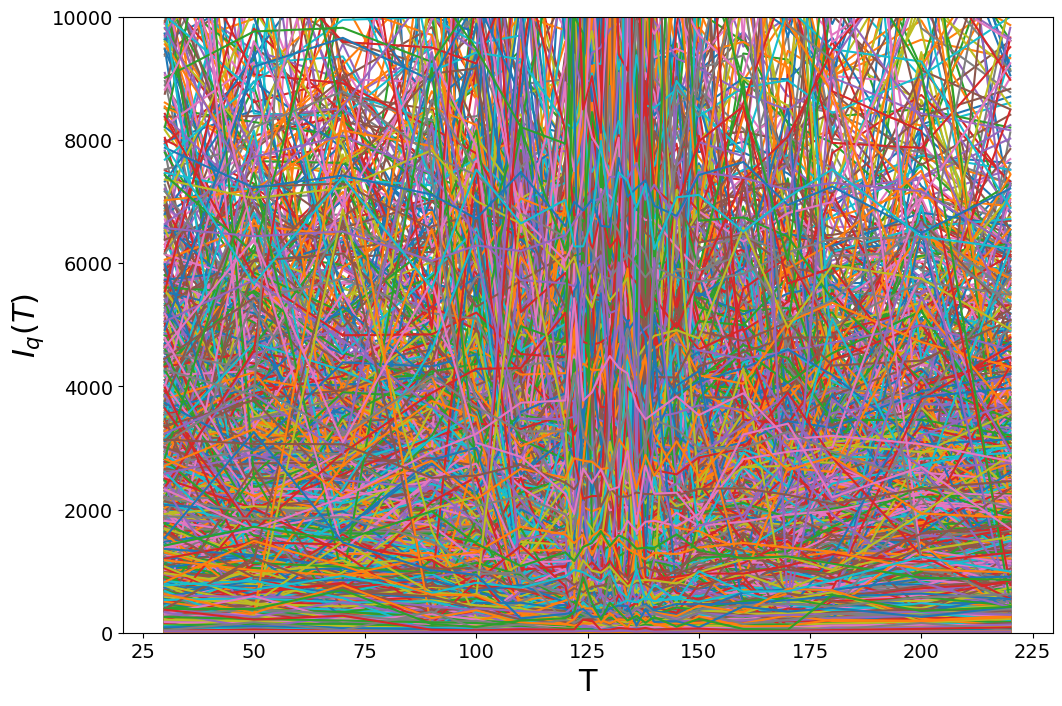

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(Tlist,data_post_thresh);
plt.xlabel('T',size=22)
plt.ylabel('$I_q(T)$',size=22)
plt.ylim((0,10000))

Notice the large range of intensities. The smooth order parameter like behavior of the CDW intensities are burried inside this large mess.

## 1.2 Rescale intensity


To reduce the large range in the scale of intensities and for efficient feature selection of the temperature trajectory, we rescale intensities $I_q(T)$ by subtracting and dividing their mean over temperature $\overline {I_q(T)}$ for each $q$:

$ \tilde{I}_q(T)=\dfrac{I_q(T)}{\overline {I_q(T)}}-1$

Some other rescaling schemes can also be applied, like z-scoring: subtracting the mean (over T) and then dividing by variance (over T),

or using $\log[I_q(T)]-\overline{\log[I_q(T)]}$.



In [ ]:

# get rescaled intensity by subtracting and dividing by the mean over T:

Rescaled_data_no_mean=(data_post_thresh-np.mean(data_post_thresh,axis=0))/np.mean(data_post_thresh,axis=0)

print('num T = ', Rescaled_data_no_mean.shape[0], ' num of thresholded (and rescaled) data = ', Rescaled_data_no_mean.shape[1] )

num T =  24  num of thresholded (and rescaled) data =  34565


Sometimes when the volume of data is very large, for quick results it is useful to remove intensities whose temperature trajectories show low variance. Let us keep all the trajectories for now.

## 2 GMM clustering

Use GMM algorithm to cluster the preprocessed data (rescaled data).

See GMM.py for details. The code uses Step-wise Expectation Maximization algorithm  (cf. Liang and Klein 2009) to cluster data.

In [ ]:
from GMM import GMM                               # for GMM clustering

### 2.1 vanilla GMM
We first apply simple GMM clustering. Here temperature series of intensity at each $q$ point is clustered independently.  

In [ ]:
num_clusters = 3                              # change this to 3, 4, 5 etc and see.
# optimal num of clusters can be estimated once adding more clusters give similar looking trajectories.



Temp            = np.array(Tlist)             # temperature list
Data_for_GMM    = Rescaled_data_no_mean.transpose()       # data should be arranged as (num_data,num_T) for GMM


# see GMM.py for details on the GMM() and RunEM(). The
clusterGMM = GMM(Data_for_GMM,num_clusters) # sets the parameters and the data for GMM clustering
clusterGMM.RunEM()                          # performs the simple (no label smoothing) EM algorithm to cluster trajectories
print('num of trajectories in each cluster: [num_red, num_blue,num_green,num_violet]=', clusterGMM.num_per_cluster)


# Here, default values are set for other (somewhat technical) parameters of GMM. Default values work well in most cases.

# The full arguments of GMM are:
# clusterGMM= GMM(Data_for_GMM, num_clusters, cov_type = "diagonal", batch_num = 1, alpha = 0.7, tol = 1e-5, max_batch_epoch = 50, max_full_epoch = 500,verbose = False)
#
# cov_type        : = "diagonal" or "full", whether to keep only diagonal elements or retain full cov matrix.
# batch_num       : number of batches. Algorithm has a "batch" phase, followed by a "full" phase that operates on the entire dataset.
# alpha           : decay exponent of i'th step-size- eta_i = (i + 2 )^{- alpha}, 0.5 < alpha < 1.
# tol             : tolerance for the convergence of loglikelihood.
# max_batch_epoch : max number of batch iterations.
# max_full_epoch  : max number of iterations on full dataset.
# verbose         : True/False on whether to print loglikelihood at each iteration.

# Try tweaking these other parameters in case default values do not converge to a stable clustering

num of trajectories in each cluster: [num_red, num_blue,num_green,num_violet]= [2033, 7719, 24813]


Let us plot the clustering results.

Let us plot the mean trajectory with 1 standard deviation shaded, for the clusters (color coded as red blue green violet etc.).

Text(0.5, 1.0, ' ')

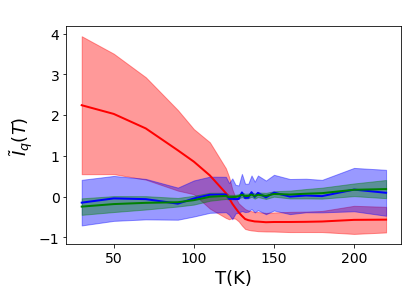

In [ ]:
clusterGMM.Plot_Cluster_Results_traj(Temp,traj_flag=False)
#       traj_flag  : if True plots the trajectories  color coded by the clustering label (can be time consuming to plot a large num of trajectories)
#                  : if False, plots the mean trajectory, and shades 1 std dev corresponding to each cluster.

plt.xlabel('T(K)', size=18)
plt.ylabel('$\widetilde{I}_q(T)$', size=18)
plt.title(' ')



#   clusterGMM.Plot_Cluster_Results_traj(x_train, traj_flag,data_means):  (see GMM.py)
#       Plots the trajectories and cluster means +- 1*variance.
#       x_train    : Temperatures, dim=(num_T)
#       traj_flag  : if True plots the trajectories  color coded by the clustering label.
#                  : if False, plots the mean trajectory, and shades 1 std dev corresponding to each cluster.
#       data_means : if not None, will shift the cluster_means. data_means, dim=(num_data), gives
#                     the value each traj needs to be offset.  Useful when to put back actual data mean,
#                      which might have been subtracted during rescaling.

#       Plotting for only less than 7 clusters currently enabled.


The order parameter like behavior of one of the cluster is apparent from here, with a transition temperature $T_c\approx 130 K$ This cluster corresponds to the CDW peak. To see that, let us plot and see which pixels in the $(h,k)$ plane belong to the red/blue/green/violet cluster.   

Text(0.5, 1.0, 'Q$_l$=0')

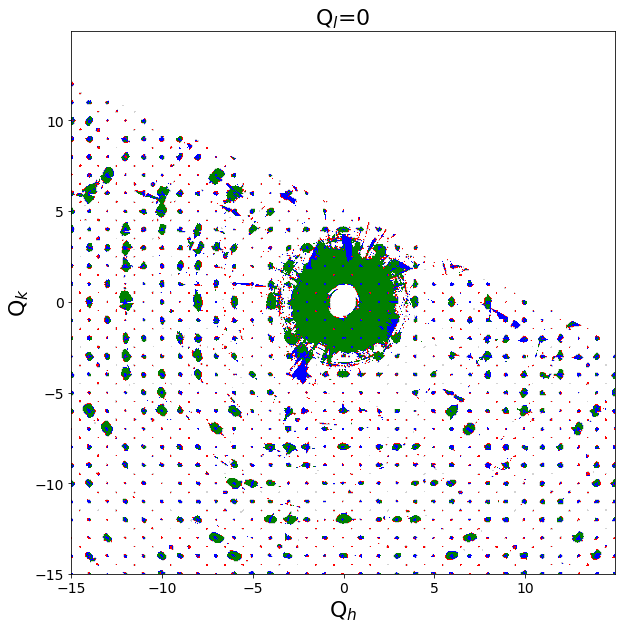

In [ ]:
Data_ind=threshold.ind_thresholded   # shape=(num_high_std_dev_data,2),give the (h,k) indices of the data
clusterGMM.Plot_Cluster_kspace_2D_slice(threshold,None,None,Data_ind)

plt.figure(figsize=(10,10))
plt.imshow(clusterGMM.plot_image,origin='lower',cmap=clusterGMM.plot_cmap,norm=clusterGMM.plot_norm,extent=[Qk[0], Qk[-1], Qh[0], Qh[-1]])
plt.xlabel("Q$_h$",size=22)
plt.ylabel("Q$_k$",size=22)
plt.title('Q$_l$=0',size=22)




#   clusterGMM.Plot_Cluster_kspace_2D_slice(threshold,figsize_,cluster_list,data_ind,slice_ind,axis_) :Plots the 2D image slice, with each (thresholded)
#   pixel color coded by the clustering label, or colored grey if not clustered.
#   the input parameters are:
#       threshold      : class Threshold_Background from Preprocessing
#       figsize_       : size of image. If None, will not plot the image
#       cluster_list   : list of cluster numbers 0,1,2 etc. to be plotted. The remaining clusters if any will show as grey.
#                        if None, all clusters will be plotted.
#       data_ind       : (h,k,l) or (h,k) indices of the clustered data. shape=(num_data,2) or (num_data,3)
#       slice_ind      : if 3D, the index along which to take the data slice, plotting_matrix.take(slice_ind, axis=axis_)
#       axis_          : axis_ of slice_ind, if data is 3D

#   Output attributes for ploting with imshow(),
#       clusterGMM.plot_image : 2D image to be plotted
#       clusterGMM.plot_cmap  : color map for the clustering, matching the same color scheme of the cluster trajectories
#       clusterGMM.plot_norm  : the norm to be used in imshow() so that cmap matches the cluster assignment integers



Text(0.5, 1.0, 'Q$_l$=0')

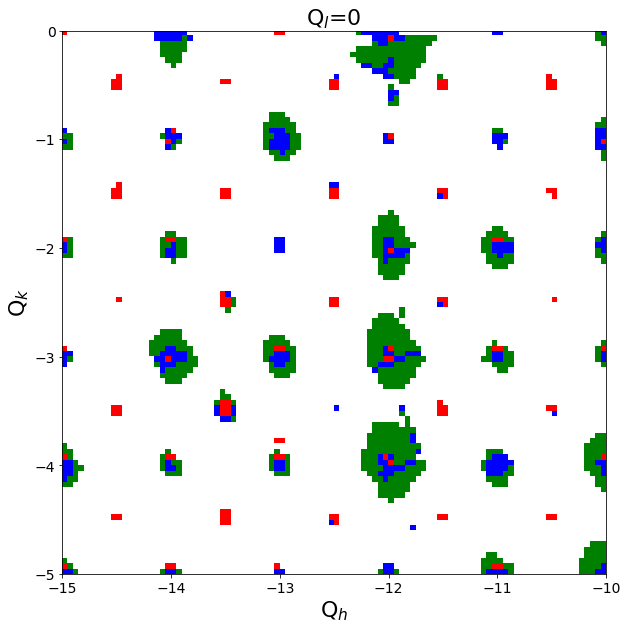

In [ ]:
# a zoom in image of the above figure..

plt.figure(figsize=(10,10))
plt.imshow(clusterGMM.plot_image[200:300,0:100],origin='lower',cmap=clusterGMM.plot_cmap,norm=clusterGMM.plot_norm,extent=[Qk[0], Qk[100], Qh[200], Qh[300]])
plt.xlabel("Q$_h$",size=22)
plt.ylabel("Q$_k$",size=22)
plt.title('Q$_l$=0',size=22)



Notice that CDW peaks at $q_{CDW} = (H+0.5,K+0.5,0)$ have overwhelmingly the same color matching the color of the order parameter like trajectory.

However, there are other features such as the diffuse trajectories around Bragg peaks (notice that their trajectory is increasing with $T$), and the noise at the centre of the plane. To focus on the more interesting features (the CDW and Bragg peaks), let us remove these noise like features for now and cluster the remaining trajectories again.   





### 2.2 Second step clustering:

Select the clusters you want to remove, and redo the GMM clustering with only the interesting clusters.  

In [ ]:
Bad_Clusters=[2] # Select the list clusters to be removed: 0 for Red, 1 for blue, 2 for green, 3 for violet, 4 for yellow, 5 for orange, 6 for pink clusters...
# Note that the color assignments can change with each run.
num_clusters_2 = 2 # set the number of new clusters for the second step clustering




# This block removes the data belonging to the bad clusters from the first clustering
cluster_assignments = clusterGMM.cluster_assignments
BadC_mask     = ~np.isin(cluster_assignments, Bad_Clusters)
Good_inds     = threshold.ind_thresholded[BadC_mask]
Good_data     = threshold.data_thresholded[:,BadC_mask]
Good_data_rescaled   = (Good_data-np.mean(Good_data,axis=0))/np.mean(Good_data,axis=0)

Data_for_GMM_2= Good_data_rescaled.transpose()


# Now perform the second step GMM clustering with the new filtered data (Data_for_GMM_2) and num_clusters_2 clusters

clusterGMM_2 = GMM(Data_for_GMM_2,num_clusters_2)
clusterGMM_2.RunEM()

print('num of trajectories after second step clustering: [num_red, num_blue]=', clusterGMM_2.num_per_cluster)



num of trajectories after second step clustering: [num_red, num_blue]= [5536, 4216]


Let us plot the cluster trajectories

Text(0.5, 1.0, ' ')

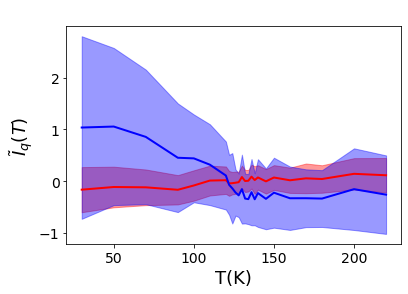

In [ ]:
clusterGMM_2.Plot_Cluster_Results_traj(Temp,traj_flag=False)
plt.xlabel('T(K)', size=18)
plt.ylabel('$\widetilde{I}_q(T)$', size=18)
plt.title(' ')



Again, we see the order parameter like cluster. Let us plot and see which pixels in the  (ℎ,𝑘)  plane belong to the new clustering assignments.

Text(0.5, 1.0, 'Q$_l$=0')

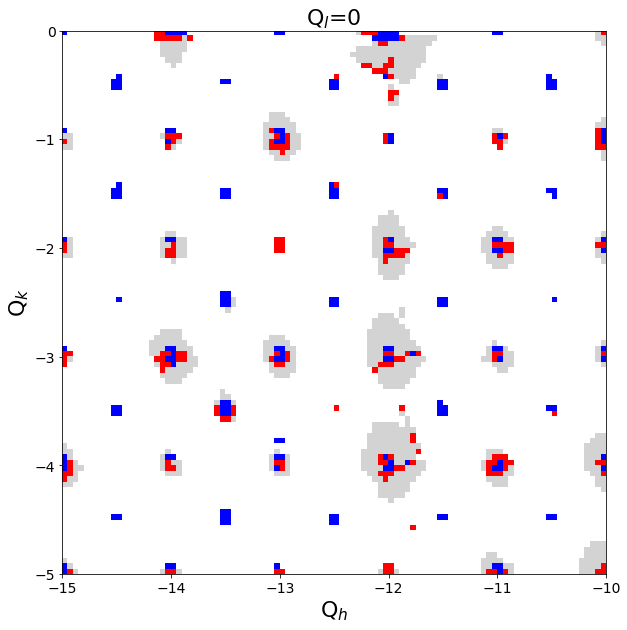

In [ ]:
Data_ind=Good_inds
clusterGMM_2.Plot_Cluster_kspace_2D_slice(threshold,None,Data_ind)

plt.figure(figsize=(10,10))
plt.imshow(clusterGMM_2.plot_image[200:300,0:100],origin='lower',cmap=clusterGMM.plot_cmap,norm=clusterGMM.plot_norm,extent=[Qk[0], Qk[100], Qh[200], Qh[300]])
plt.xlabel("Q$_h$",size=22)
plt.ylabel("Q$_k$",size=22)
plt.title('Q$_l$=0',size=22)


The bad clusters not selected for the second round clustering are now labeled as grey pixels. The order parameter trajectory is predominantly occupied by the CDW peaks.     

However, there are some neighbouring pixels assigned to different colors, when we expect them to correspond to same cluster. This is the consequence of neglecting correlations between neighboring points, and between different unit cells. These correlations are accounted in the label smoothing procedure, shown below.



### 2.2 GMM with label smoothing

Label smoothing incorporates correlations between neighboring pixels and across unit cells by allowing labels to diffuse between neighboring points and between unit cells. To implement this label diffusion, we should construct a weighted graph (adjacency matrix or Markov_Matrix) connecting similar momenta. This is implemented by Build_Markov_matrix in GMM_kernels.py.

Label smoothing is performed by introducing Markov_Matrix between E and M step to diffuse cluster probabilities with neighbouring data.


We implement clustering with label smoothing on the data after first step clustering (Data_for_GMM_2)

See GMM_kernels.py for details on the code, and supplementary materials of Venderley et al, https://arxiv.org/abs/2008.03275.


#### Build Markov matrix

In [ ]:
from GMM import GMM_kernels                               # for generating Markov matrix for label smoothing

In [ ]:
data_inds = Good_inds
unit_cell_shape = np.array([20,20])
L_scale = .2               # change L_scale to control the length scale for smoothing the labels
kernel_type = 'periodic'
uniform_similarity = True
Markov_matrix = GMM_kernels.Build_Markov_Matrix(data_inds, L_scale,kernel_type,unit_cell_shape,uniform_similarity)




# The parameters of Build_Markov_Matrix are:
#        data_inds (num_data,dim): contain the  hkl indices (dim=3 or dim=2) of the preprocessed data
#        L_scale: lengthscale for local correlations
#        Kernel_type= 'local' / 'periodic' : indicating whether correlations are local,
#                      or periodic (with unit_cell_shape)
#        unit_cell_shape: an array that gives the size of unit cell (integer lengths in unit of number of pixels)
#                          (only needed for periodic kernel)
#        uniform_similarity= True/False: if True, sets all nonzero elements of Markov matrix (above zero_cutoff) to 1 (with
#                                     a normalization factor)
#        zero_cutoff =1e-2 sets the cutoff to select nonzero elements of Markov matrix





	Building Adjacency Matrix,  ...
	Finished Building Adjacency Matrix in 18.937408447265625 s 



#### Run EM with label smoothing

In [ ]:
num_clusters_2=2
Smooth_clusterGMM = GMM(Data_for_GMM_2,num_clusters_2)
smoothing_iterations=1      # number of times Markov matrix is introduced between E and M step
Smooth_clusterGMM.RunEM(True, Markov_matrix,smoothing_iterations)   # RunEM with Markov matrix

print('num of trajectories in each cluster:', Smooth_clusterGMM.num_per_cluster)


num of trajectories in each cluster: [2055, 7697]


Text(0.5, 1.0, 'GMM with label smoothing')

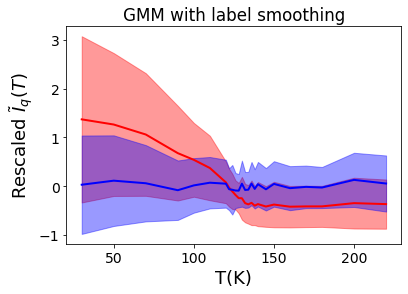

In [ ]:
# plot cluster mean trajectories and their variance
Smooth_clusterGMM.Plot_Cluster_Results_traj(Temp,traj_flag=False)
plt.xlabel('T(K)',size=18)
plt.ylabel('Rescaled $\widetilde{I}_q(T)$', size=18)
plt.title('GMM with label smoothing')

Let us plot the clustering assignments to see if $(h,k)$ points have smooth labels   

Text(0.5, 1.0, 'Q$_l$=0, GMM with label smoothing')

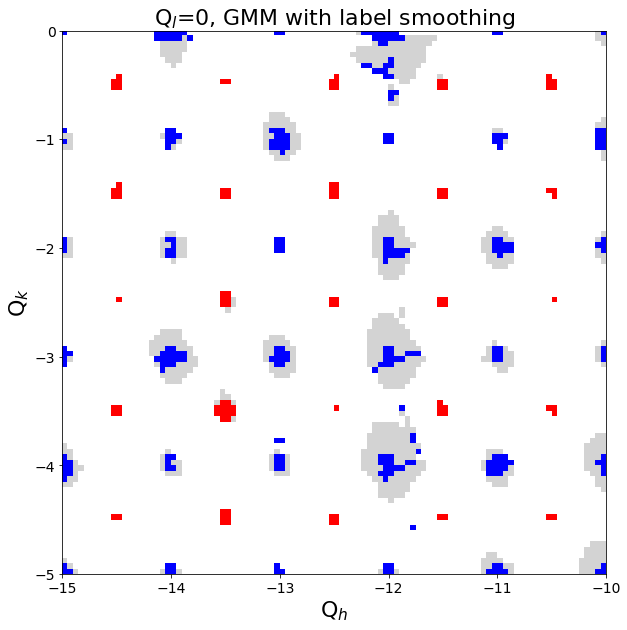

In [ ]:
Smooth_clusterGMM.Plot_Cluster_kspace_2D_slice(threshold,None,Data_ind)

plt.figure(figsize=(10,10))
plt.imshow(Smooth_clusterGMM.plot_image[200:300,0:100],origin='lower',cmap=Smooth_clusterGMM.plot_cmap,norm=Smooth_clusterGMM.plot_norm,extent=[Qk[0], Qk[100], Qh[200], Qh[300]])
plt.xlabel("Q$_h$",size=22)
plt.ylabel("Q$_k$",size=22)
plt.title('Q$_l$=0, GMM with label smoothing',size=22)


Now, we have same labels (colors) for neighboring points. All CDW peaks have one color, matching that of the order parameter trajectory, while Bragg peaks have the other color.

Label smoothing automatically harmonizes the assignments in the vicinity of each peak, however at the cost of weakening the cluster separation.